In [ ]:
import pandas as pd 

# Read data, drop meta columns and get general view

In [10]:
data = pd.read_csv("dataset_6/TCGA_GBM_LGG_Mutations_all.csv")
data = data.drop(columns=["Project", "Case_ID"])
data.describe()

,Grade,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,862,862,862,862,862,862,862,862,862,862,...,862,862,862,862,862,862,862,862,862,862
unique,2,3,838,7,6,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,LGG,Male,--,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
freq,499,499,5,360,766,448,508,642,718,748,...,815,821,824,833,834,834,835,839,839,840


# Data preprocessing


## Age
1. filter missing age  
2. encode age at diagnosis as a single number - number of days 

In [45]:
data = data[data["Age_at_diagnosis"] != "--"]

In [49]:
# races enum 
import re
from typing import Optional

AGE_AT_DIAGNOSIS_FULL_PATTERN = r"(?P<years>[0-9]*) years (?P<days>[0-9]*) days" 
AGE_AT_DIAGNOSIS_SHORT_PATTERN = r"(?P<years>[0-9]*) years"
DAYS_IN_YEAR = 365 


def parse_age_with_full_pattern(age_string: str) -> Optional[int]:
    match = re.match(AGE_AT_DIAGNOSIS_FULL_PATTERN, age_string)
    if match is None:
        return None 
    match = match.groupdict()
    years = int(match["years"])
    days = int(match["days"])
    return years * DAYS_IN_YEAR + days 

    
def parse_age_with_short_pattern(age_string: str) -> Optional[int]:
    match = re.match(AGE_AT_DIAGNOSIS_SHORT_PATTERN, age_string)
    if match is None:
        return None 

    match = match.groupdict()
    years = int(match["years"])
    return years * DAYS_IN_YEAR


def parse_age_string_as_number_of_days(age_string: str) -> Optional[int]:
    output: Optional[int] = parse_age_with_full_pattern(age_string)
    if output is None:
        output = parse_age_with_short_pattern(age_string)
    if output is None:
        raise ValueError(f"could not parse {age_string}")
    return output


data["Age_at_diagnosis"] = data["Age_at_diagnosis"].apply(parse_age_string_as_number_of_days)

## Race
1. remove entries with missing race 

In [54]:
## Race 
data = data[data["Race"] != "not reported"]

# EDA

## Gender, Race, Age influence

<Axes: xlabel='Grade'>

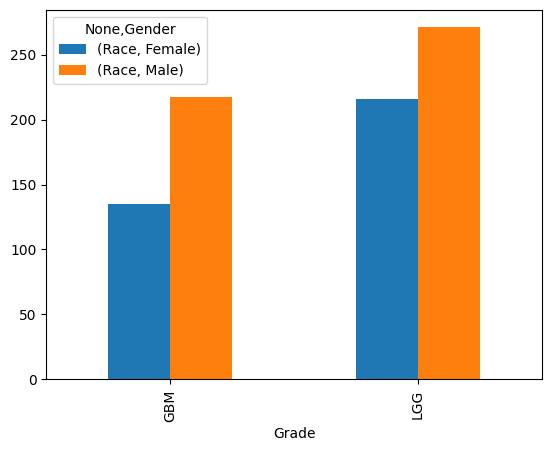

In [88]:
subset = data[["Gender", "Grade", "Race"]]
group = subset.groupby(by=["Grade", "Gender"]).count()
group.unstack().plot.bar()

<Axes: xlabel='Grade'>

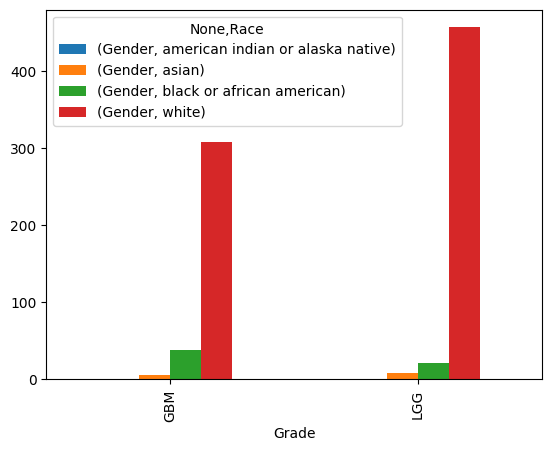

In [89]:
subset = data[["Gender", "Grade", "Race"]]
group = subset.groupby(by=["Grade", "Race"]).count()
group.unstack().plot.bar()

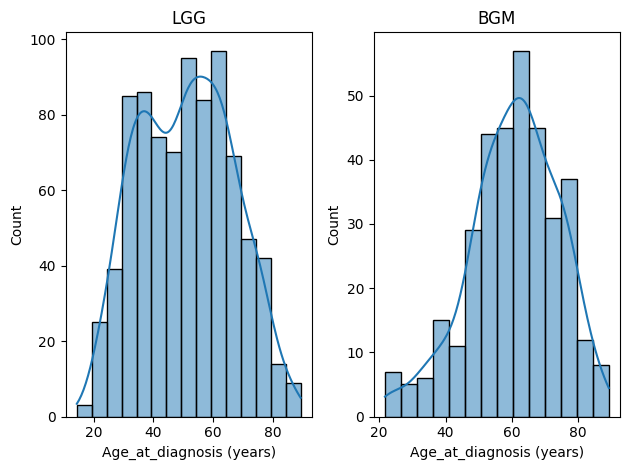

In [110]:
import matplotlib.pyplot as plt 
import seaborn as sns 
fig, (lgg_ax, gbm_ax) = plt.subplots(1, 2)
lgg_subset = data[data["Grade"] == "LGG"] 
gbm_subset = data[data["Grade"] == "GBM"]
lgg_ax.set_title("LGG")
gbm_ax.set_title("BGM")
lgg_ax.set_xlabel("Age_at_diagnosis (years)")
gbm_ax.set_xlabel("Age_at_diagnosis (years)")

sns.histplot(data["Age_at_diagnosis"] / DAYS_IN_YEAR, ax=lgg_ax, kde=True)
sns.histplot(gbm_subset["Age_at_diagnosis"] / DAYS_IN_YEAR, ax=gbm_ax, kde=True)
fig.tight_layout()